In [1]:
!pip install pandas -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn
!pip install statsmodels -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv(r'house_information.csv') 
data.head()
data.drop('index',axis=1,inplace=True) 
data.head()

,单价,小区名称,建筑面积,户型,房屋总价,朝向,楼层,装修
0,41117元/平米,仙岳山庄,104.58平米,2室2厅2卫,430万,南北,低层,简装修
1,63489元/平米,禹洲华侨海景城,201.61平米,5室2厅2卫,1280万,东北,高层,豪华装修
2,58339元/平米,汇丰家园,128.56平米,3室2厅2卫,750万,南北,中层,中装修
3,46739元/平米,嘉盛豪园,92平米,3室2厅1卫,430万,南北,中层,精装修
4,43952元/平米,金帝花园,118.31平米,3室2厅2卫,520万,南北,高层,简装修


In [3]:
data[['室','厅','卫']] = data['户型'].str.extract(r'(\d+)室(\d+)厅(\d+)卫')
data['室'] = data['室'].astype(float)
data['厅'] = data['厅'].astype(float)
data['卫'] = data['卫'].astype(float)
del data['户型']
data.head()

,单价,小区名称,建筑面积,房屋总价,朝向,楼层,装修,室,厅,卫
0,41117元/平米,仙岳山庄,104.58平米,430万,南北,低层,简装修,2.0,2.0,2.0
1,63489元/平米,禹洲华侨海景城,201.61平米,1280万,东北,高层,豪华装修,5.0,2.0,2.0
2,58339元/平米,汇丰家园,128.56平米,750万,南北,中层,中装修,3.0,2.0,2.0
3,46739元/平米,嘉盛豪园,92平米,430万,南北,中层,精装修,3.0,2.0,1.0
4,43952元/平米,金帝花园,118.31平米,520万,南北,高层,简装修,3.0,2.0,2.0


In [4]:
data['建筑面积'] = data['建筑面积'].map(lambda e:e.replace('平米',''))# Series中的map
data['建筑面积'] = data['建筑面积'].astype(float)
data.head()

,单价,小区名称,建筑面积,房屋总价,朝向,楼层,装修,室,厅,卫
0,41117元/平米,仙岳山庄,104.58,430万,南北,低层,简装修,2.0,2.0,2.0
1,63489元/平米,禹洲华侨海景城,201.61,1280万,东北,高层,豪华装修,5.0,2.0,2.0
2,58339元/平米,汇丰家园,128.56,750万,南北,中层,中装修,3.0,2.0,2.0
3,46739元/平米,嘉盛豪园,92.00,430万,南北,中层,精装修,3.0,2.0,1.0
4,43952元/平米,金帝花园,118.31,520万,南北,高层,简装修,3.0,2.0,2.0


In [5]:
data['单价'] = data['单价'].map(lambda e:e.replace(r'元/平米',''))
data['单价'] = data['单价'].astype(float)
data.head()

,单价,小区名称,建筑面积,房屋总价,朝向,楼层,装修,室,厅,卫
0,41117.0,仙岳山庄,104.58,430万,南北,低层,简装修,2.0,2.0,2.0
1,63489.0,禹洲华侨海景城,201.61,1280万,东北,高层,豪华装修,5.0,2.0,2.0
2,58339.0,汇丰家园,128.56,750万,南北,中层,中装修,3.0,2.0,2.0
3,46739.0,嘉盛豪园,92.00,430万,南北,中层,精装修,3.0,2.0,1.0
4,43952.0,金帝花园,118.31,520万,南北,高层,简装修,3.0,2.0,2.0


In [6]:
data['房屋总价'] = data['房屋总价'].map(lambda e:e.replace('万',''))
data['房屋总价'] = data['房屋总价'].astype(float)
data.head()

,单价,小区名称,建筑面积,房屋总价,朝向,楼层,装修,室,厅,卫
0,41117.0,仙岳山庄,104.58,430.0,南北,低层,简装修,2.0,2.0,2.0
1,63489.0,禹洲华侨海景城,201.61,1280.0,东北,高层,豪华装修,5.0,2.0,2.0
2,58339.0,汇丰家园,128.56,750.0,南北,中层,中装修,3.0,2.0,2.0
3,46739.0,嘉盛豪园,92.00,430.0,南北,中层,精装修,3.0,2.0,1.0
4,43952.0,金帝花园,118.31,520.0,南北,高层,简装修,3.0,2.0,2.0


In [7]:
data_direction = pd.get_dummies(data['朝向'])
data_direction.head()
data_floor = pd.get_dummies(data['楼层'])
data_floor.head()
data_decoration = pd.get_dummies(data['装修'])
data_decoration.head()
data = pd.concat([data,data_direction,data_floor,data_decoration],axis=1) 
data.columns
del data['小区名称']
del data['朝向']
del data['楼层']
del data['装修']
del data['东西']
del data['南北']
del data['暂无'] 
del data['中层'] 
del data['中装修']
data.columns
data.head()

,单价,建筑面积,房屋总价,室,厅,卫,东,东北,东南,北,南,西,西北,西南,低层,高层,毛坯,简装修,精装修,豪华装修
0,41117.0,104.58,430.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,63489.0,201.61,1280.0,5.0,2.0,2.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,58339.0,128.56,750.0,3.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,46739.0,92.00,430.0,3.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,43952.0,118.31,520.0,3.0,2.0,2.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [8]:
data.info()
data.dropna(inplace=True)
data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5830 entries, 0 to 5829
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   单价      5830 non-null   float64
 1   建筑面积    5830 non-null   float64
 2   房屋总价    5830 non-null   float64
 3   室       5748 non-null   float64
 4   厅       5748 non-null   float64
 5   卫       5748 non-null   float64
 6   东       5830 non-null   uint8  
 7   东北      5830 non-null   uint8  
 8   东南      5830 non-null   uint8  
 9   北       5830 non-null   uint8  
 10  南       5830 non-null   uint8  
 11  西       5830 non-null   uint8  
 12  西北      5830 non-null   uint8  
 13  西南      5830 non-null   uint8  
 14  低层      5830 non-null   uint8  
 15  高层      5830 non-null   uint8  
 16  毛坯      5830 non-null   uint8  
 17  简装修     5830 non-null   uint8  
 18  精装修     5830 non-null   uint8  
 19  豪华装修    5830 non-null   uint8  
dtypes: float64(6), uint8(14)
memory usage: 353.1 KB
<class 'pandas.core.frame.

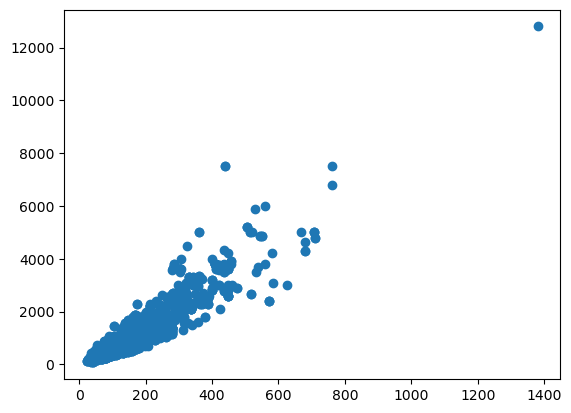

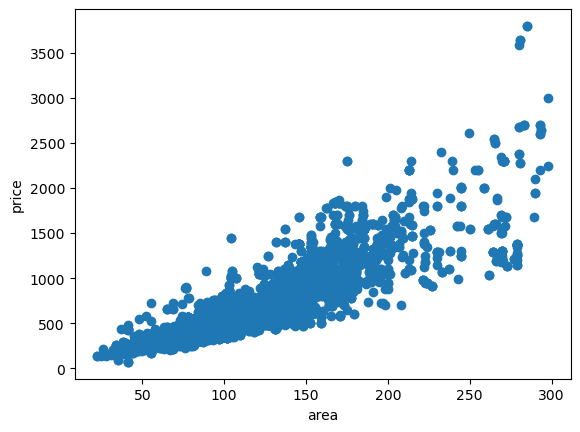

In [9]:
data['建筑面积']
import matplotlib.pyplot as plt
area = data['建筑面积']
price = data['房屋总价']
plt.scatter(area,price)
plt.show()
df = data[data['建筑面积'] <=300] 
area = df['建筑面积']
price = df['房屋总价']
#print(area.count()) 
plt.scatter(area,price)
plt.xlabel("area")
plt.ylabel("price")
plt.show()

[-187.73888919] [[7.39200324]]


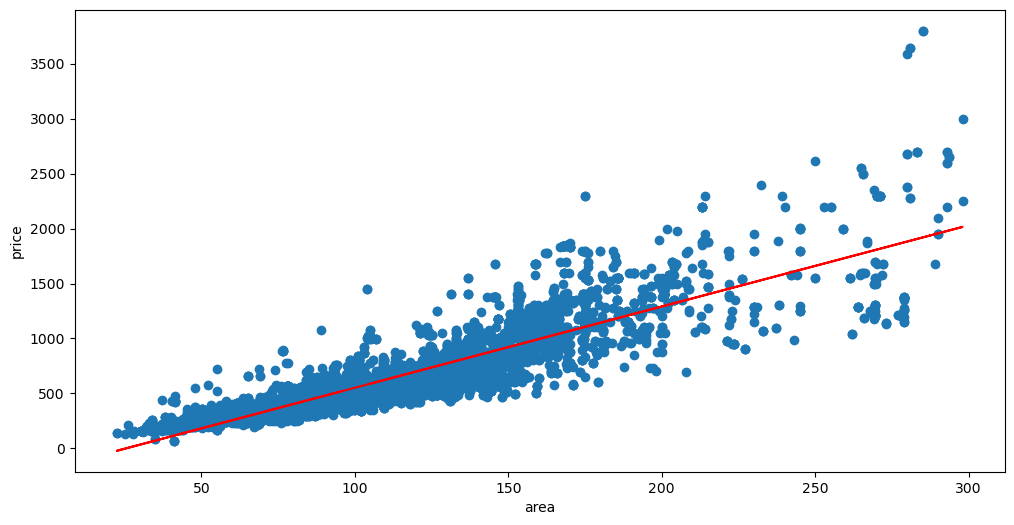

In [10]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
area = np.array(area).reshape(-1,1) 
price = np.array(price).reshape(-1,1)
model = linear.fit(area,price)
print(model.intercept_, model.coef_)
linear_p = model.predict(area)
plt.figure(figsize=(12,6))
plt.scatter(area,price)
plt.plot(area,linear_p,'red')
plt.xlabel("area")
plt.ylabel("price")
plt.show()

In [11]:
cols = ['建筑面积','室', '厅', '卫', '东', '东北', '东南', '北', '南', '西',
       '西北', '西南', '低层', '高层', '毛坯', '简装修', '精装修', '豪华装修']
X = df[cols]
X.head()
y = df['房屋总价']
y.head()
print(type(X))
print(type(y))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
linear = LinearRegression()
model = linear.fit(x_train,y_train)
print(model.intercept_, model.coef_)
price_end = model.predict(x_test)
score = model.score(x_test,y_test) 
print("SCORE：",score)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(4406, 18) (4406,)
(1102, 18) (1102,)
-194.10059828632882 [  6.81080385  32.66440227 -36.27370796   8.17388714  22.82870564
 -34.63169345   0.9396494   31.52349203  73.23243807  36.57946634
 -20.85576479  35.85073408   4.13506426 -10.09803905  70.75146155
  -3.6000263   48.66249505 124.16793037]
SCORE： 0.7639142687890216


In [12]:
linear = LinearRegression()
model = linear.fit(x_train,y_train)
print(model.intercept_, model.coef_)
price_end = model.predict(x_test)
score = model.score(x_test,y_test) 
print("模型得分：",score)

-194.10059828632882 [  6.81080385  32.66440227 -36.27370796   8.17388714  22.82870564
 -34.63169345   0.9396494   31.52349203  73.23243807  36.57946634
 -20.85576479  35.85073408   4.13506426 -10.09803905  70.75146155
  -3.6000263   48.66249505 124.16793037]
模型得分： 0.7639142687890216


In [13]:
cols = ['建筑面积','室', '厅', '卫', '东', '东北', '东南', '北', '南', '西',
       '西北', '西南', '低层', '高层', '毛坯', '简装修', '精装修', '豪华装修']
import statsmodels.api as sm
Y = df['房屋总价']
X = df[cols]
X_ = sm.add_constant(X) 
result = sm.OLS(Y,X_)
summary = result.fit()
summary.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.771     
Dependent Variable: 房屋总价             AIC:                74021.4015
Date:               2024-01-03 17:16 BIC:                74147.0667
No. Observations:   5508             Log-Likelihood:     -36992.   
Df Model:           18               F-statistic:        1030.     
Df Residuals:       5489             Prob (F-statistic): 0.00      
R-squared:          0.772            Scale:              40037.    
--------------------------------------------------------------------
           Coef.    Std.Err.     t      P>|t|     [0.025     0.975] 
--------------------------------------------------------------------
const    -190.5740   14.3527  -13.2779  0.0000  -218.7111  -162.4370
建筑面积        6.7798    0.1065   63.6645  0.0000     6.5711     6.9886
室          32.4766    4.8180    6.7407  0.0000    23.0315    41.9218
厅         -36.6403    7.4305   -4.9311  0.0000   -51.2070   -22.0735
卫           5.9103    5.9003    1.0017  0.3165    -5.6565    17.4771
东          23.4166   13.2163    1.7718  0.0765    -2.4925    49.3258
东北        -34.1670   17.2426   -1.9815  0.0476   -67.9694    -0.3645
东南          9.0724   10.6111    0.8550  0.3926   -11.7295    29.8744
北          25.5771   19.4207    1.3170  0.1879   -12.4952    63.6493
南          69.3747   11.3337    6.1211  0.0000    47.1560    91.5933
西          28.2927   24.8301    1.1395  0.2546   -20.3842    76.9695
西北        -21.8337   15.8412   -1.3783  0.1682   -52.8888     9.2213
西南         33.8956   13.4285    2.5241  0.0116     7.5703    60.2208
低层          8.6321    6.8894    1.2530  0.2103    -4.8738    22.1381
高层         -8.0947    6.3467   -1.2754  0.2022   -20.5367     4.3472
毛坯         86.0976   15.2708    5.6381  0.0000    56.1608   116.0343
简装修        -1.7023    8.4182   -0.2022  0.8398   -18.2053    14.8007
精装修        51.9228    8.3723    6.2018  0.0000    35.5098    68.3358
豪华装修      113.2164   12.8088    8.8389  0.0000    88.1060   138.3267
-------------------------------------------------------------------
Omnibus:             1795.844      Durbin-Watson:         2.046    
Prob(Omnibus):       0.000         Jarque-Bera (JB):      16937.679
Skew:                1.283         Prob(JB):              0.000    
Kurtosis:            11.199        Condition No.:         1177     
===================================================================
* The condition number is large (1e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [14]:
import itertools

list1 = [1, 2,3, 4, 5,6,7,8,9,10,11,12,13,14,15,16] 
list2 = []
for i in range(1, len(list1)+1):
    iter1 = itertools.combinations(list1, i)
    list2.append(list(iter1))
#print(list2)

In [15]:
import itertools
fileds = ['建筑面积','室', '厅', '卫', '东','北', '南', '西','低层', '高层', '毛坯', '简装修', '精装修', '豪华装修']
acis = {}
for i in range(1,len(fileds)+1):
    for virables in itertools.combinations(fileds,i): 
        x1 = sm.add_constant(df[list(virables)])
        x2 = sm.OLS(Y,x1)
        res = x2.fit()
        acis[virables] = res.aic 

In [16]:
from collections import Counter
counter = Counter(acis) #最佳特征组合
counter.most_common()[-10:] 

[(('建筑面积', '室', '厅', '东', '南', '西', '低层', '毛坯', '精装修', '豪华装修'),
  74023.56464247877),
 (('建筑面积', '室', '厅', '东', '北', '南', '西', '高层', '毛坯', '精装修', '豪华装修'),
  74023.41564227329),
 (('建筑面积', '室', '厅', '卫', '东', '南', '高层', '毛坯', '精装修', '豪华装修'),
  74023.36778965591),
 (('建筑面积', '室', '厅', '东', '北', '南', '低层', '高层', '毛坯', '精装修', '豪华装修'),
  74023.31766334853),
 (('建筑面积', '室', '厅', '东', '南', '西', '高层', '毛坯', '精装修', '豪华装修'),
  74023.14955002116),
 (('建筑面积', '室', '厅', '东', '北', '南', '低层', '毛坯', '精装修', '豪华装修'),
  74023.14910923649),
 (('建筑面积', '室', '厅', '东', '南', '低层', '高层', '毛坯', '精装修', '豪华装修'),
  74023.02854387014),
 (('建筑面积', '室', '厅', '东', '北', '南', '高层', '毛坯', '精装修', '豪华装修'),
  74022.91373410511),
 (('建筑面积', '室', '厅', '东', '南', '低层', '毛坯', '精装修', '豪华装修'), 74022.8722434788),
 (('建筑面积', '室', '厅', '东', '南', '高层', '毛坯', '精装修', '豪华装修'), 74022.56669895534)]

In [17]:
col2 = ['建筑面积', '室', '厅', '东', '南', '高层', '毛坯', '精装修', '豪华装修']
X = df[col2]
y = df['房屋总价']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=13)
linear = LinearRegression()
model = linear.fit(x_train,y_train)
model.score(x_test,y_test) 

0.764510909319327

In [18]:
my_house = [120,3,1,0,1,1,0,1,0] #预测
my_house = np.array(my_house).reshape(-1,1).T
model.predict(my_house)

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([811.49301398])